In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

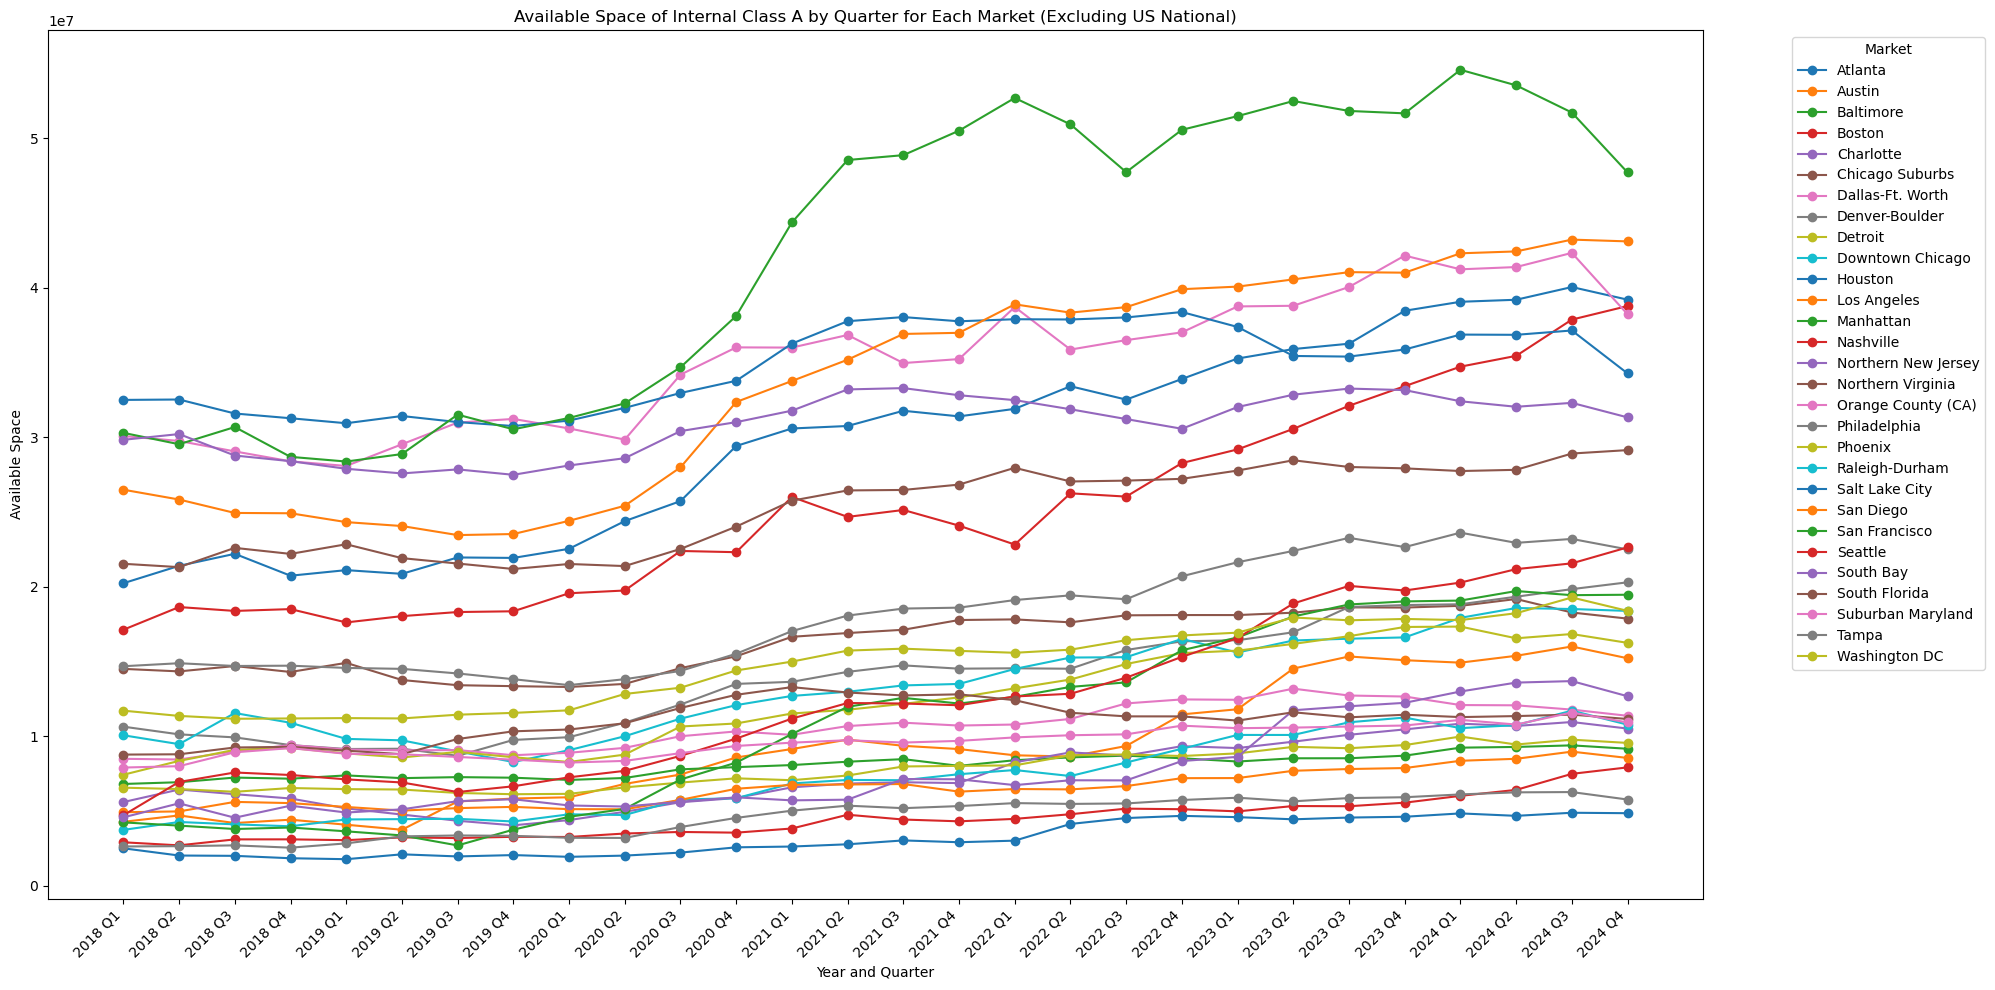

In [6]:

price_availability_data = pd.read_csv('../Datasets/Price and Availability Data.csv')

class_a_data = price_availability_data[
    (price_availability_data['internal_class'] == 'A') & 
    (price_availability_data['market'] != 'US National')
].copy() 

class_a_data['year_quarter'] = class_a_data['year'].astype(str) + " " + class_a_data['quarter'].astype(str)

grouped_data = class_a_data.groupby(['market', 'year_quarter'])['available_space'].sum().reset_index()

grouped_data['year'] = grouped_data['year_quarter'].str[:4].astype(int)
grouped_data['quarter'] = grouped_data['year_quarter'].str[-1].astype(int)
grouped_data = grouped_data.sort_values(['year', 'quarter'])

pivot_data = grouped_data.pivot(index='year_quarter', columns='market', values='available_space')

plt.figure(figsize=(20, 10))
for market in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[market], marker='o', label=market)

plt.title('Available Space of Internal Class A by Quarter for Each Market (Excluding US National)')
plt.xlabel('Year and Quarter')
plt.ylabel('Available Space')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

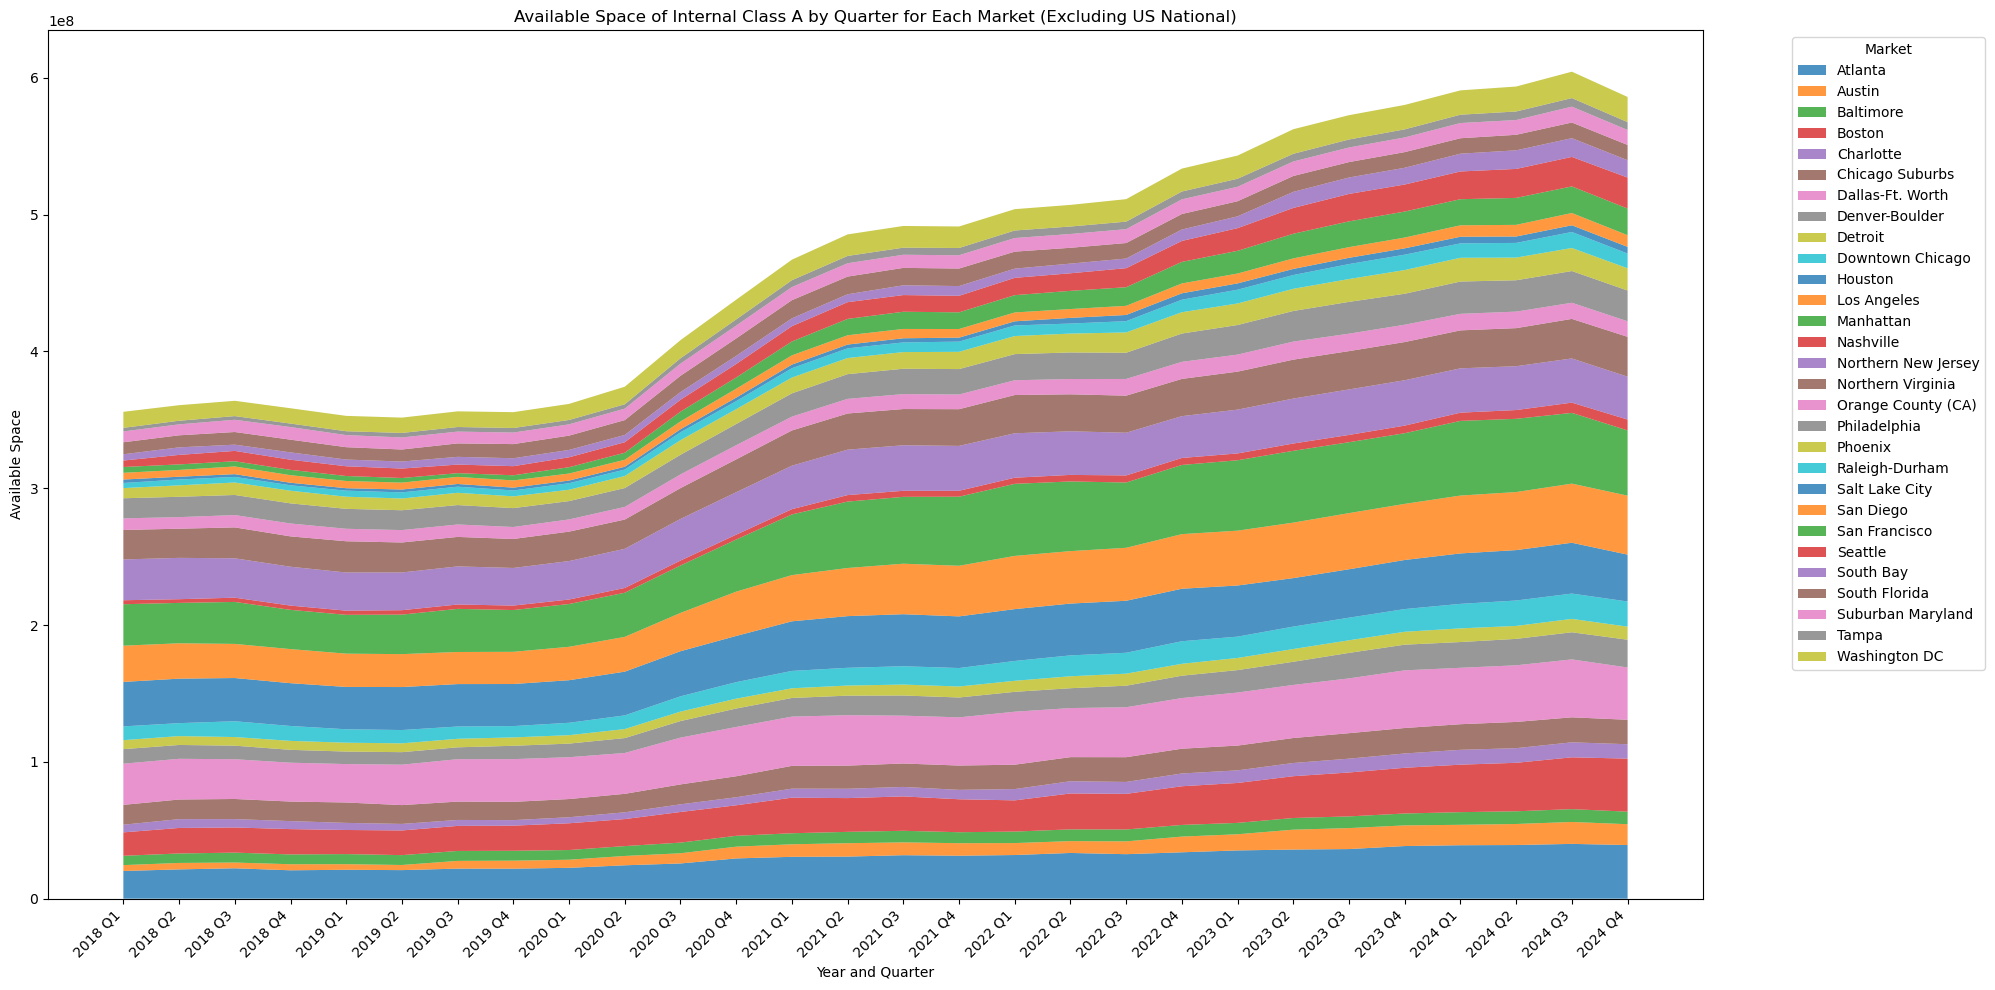

In [7]:
price_availability_data = pd.read_csv('../Datasets/Price and Availability Data.csv')  

class_a_data = price_availability_data[
    (price_availability_data['internal_class'] == 'A') & 
    (price_availability_data['market'] != 'US National')
].copy() 

class_a_data['year_quarter'] = class_a_data['year'].astype(str) + ' ' + class_a_data['quarter'].astype(str)

grouped_data = class_a_data.groupby(['market', 'year_quarter'])['available_space'].sum().reset_index()

grouped_data['year'] = grouped_data['year_quarter'].str[:4].astype(int)
grouped_data['quarter'] = grouped_data['year_quarter'].str[-1].astype(int)
grouped_data = grouped_data.sort_values(['year', 'quarter'])

pivot_data = grouped_data.pivot(index='year_quarter', columns='market', values='available_space')

plt.figure(figsize=(20, 10))
plt.stackplot(pivot_data.index, pivot_data.T, labels=pivot_data.columns, alpha=0.8)

plt.title('Available Space of Internal Class A by Quarter for Each Market (Excluding US National)')
plt.xlabel('Year and Quarter')
plt.ylabel('Available Space')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
leases = pd.read_csv('../Datasets/Leases.csv')
leases.head()

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
